<a href="https://colab.research.google.com/github/mel-108/Melwin/blob/main/Project_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORT LIBRARIES

import pandas as pd
import numpy as np
import random
import os

from tqdm.notebook import tqdm

import geopandas as gpd
from shapely.geometry import Point
import folium

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
#Loading the dataset

Data=pd.read_csv("climate_nasa.csv")
df=pd.DataFrame(Data)
print(df.head())

                       date  likesCount  \
0  2022-09-07T17:12:32.000Z           2   
1  2022-09-08T14:51:13.000Z           0   
2  2022-09-07T17:19:41.000Z           1   
3  2022-09-08T00:51:30.000Z           4   
4  2022-09-07T19:06:20.000Z          16   

                                         profileName  commentsCount  \
0  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            NaN   
1  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            NaN   
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...            3.0   
3  37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...            NaN   
4  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...           26.0   

                                                text  
0  Neat comparison I have not heard it before.\n ...  
1  An excellent way to visualise the invisible! T...  
2  Does the CO2/ghg in the troposphere affect the...  
3  excellent post! I defo feel the difference - o...  
4  Yes, and carbon dioxide does not har

In [ ]:
#2 DATASET PREPARATION

#Loading the train and test dataset

data=pd.read_csv("climate_train.csv")
df1=pd.DataFrame(data)


#Exploring and previewing the train dataset
print(df1.head())

   Year     CO2_ppm      CH4_ppb  Precipitation_mm  Solar_Radiation_Wm2  \
0  1980  339.711674  1645.944402       1002.657064          1359.342559   
1  1981  340.550515  1654.747327       1052.690179          1359.781712   
2  1982  341.748129  1667.541956        967.074237          1358.857407   
3  1983  344.861251  1663.311188       1092.222436          1358.626113   
4  1984  346.397840  1666.064603        996.224279          1359.918723   

   Sea_Level_mm  Temperature_Anomaly_C  
0    -27.714119              -0.191992  
1    -23.654592              -0.089259  
2    -15.844772               0.007849  
3    -22.440590              -0.063212  
4    -15.851218              -0.032874  


In [ ]:


#3 DATA MANIPULATION AND VISUALIZATION

#*Data manipulation

#checking for null values

print(df.isnull().sum())

date               0
likesCount         0
profileName        0
commentsCount    278
text              18
dtype: int64


In [ ]:

#3 DATA EXPLORATION AND VISUALIZATION

#*Data exploration

#checking for null values

# dropping the rows that contains null values in the columns comments count
#and text using dropna()

df_clean = df.dropna(subset=['commentsCount', 'text'])

#Filling the remaining numeric nulls with mean
df_filled = df_clean.fillna(df_clean.mean(numeric_only=True))

# df_clean is cleaned dataframe and checking for null values
print(df_clean.isnull().sum())

date             0
likesCount       0
profileName      0
commentsCount    0
text             0
dtype: int64


In [ ]:

#Renaming the old column name with a new column name I was feeling difficult in manipulating

df1.rename(columns={'CO2_ppm': 'Carbon Dioxide'}, inplace=True)
df1.rename(columns={'CH4_ppb': 'Methane'}, inplace=True)
df1.rename(columns={'Precipitation_mm': 'Precipitation'}, inplace=True)
df1.rename(columns={'Solar_Radiation_Wm2': 'Solar_Radiation'}, inplace=True)
df1.rename(columns={'Sea_Level_mm': 'Sea_level'}, inplace=True)
df1.rename(columns={'Temperature_Anomaly_C': 'Temperature_anomaly'}, inplace=True)
print(df1.columns)

Index(['Year', 'Carbon Dioxide', 'Methane', 'Precipitation', 'Solar_Radiation',
       'Sea_level', 'Temperature_anomaly'],
      dtype='object')


In [ ]:

#Concatinating the First cleaned DataFrame(df_clean) and the second Dataframe (df1)

Dataset=pd.concat([df_clean,df1])

print(Dataset)

                        date  likesCount  \
2   2022-09-07T17:19:41.000Z         1.0   
4   2022-09-07T19:06:20.000Z        16.0   
5   2022-09-15T17:10:57.000Z         4.0   
7   2022-09-07T18:07:53.000Z         1.0   
9   2022-09-07T16:30:55.000Z         4.0   
..                       ...         ...   
27                       NaN         NaN   
28                       NaN         NaN   
29                       NaN         NaN   
30                       NaN         NaN   
31                       NaN         NaN   

                                          profileName  commentsCount  \
2   d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...            3.0   
4   e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...           26.0   
5   191055fb869d185092abf1405f0b2f4abe73bcaa9beb85...            1.0   
7   39c3ec5a079b6b1a62577a1d13d4e8f894c5525575b85d...           21.0   
9   31fd4cfea1a56eb21ad6a86ce4ed94e6a15e654b3557bf...            8.0   
..                                     

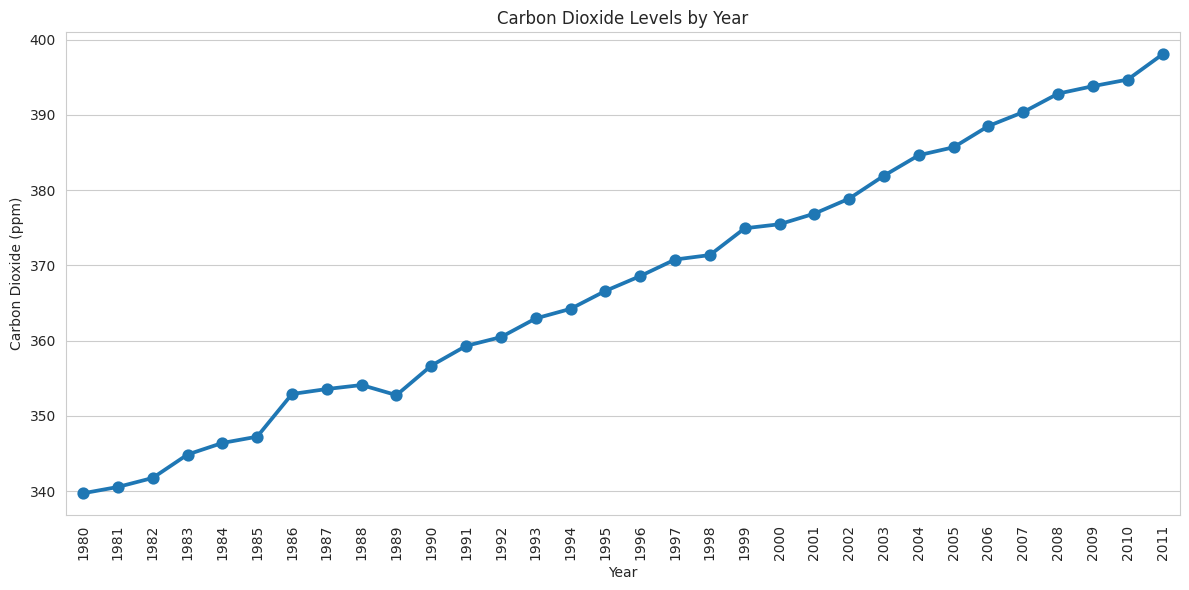

In [ ]:
#DATA VISUALIZATION

#representing the carbon dioxide levels with respect to years
#data usage df1

sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.pointplot(x='Year', y='Carbon Dioxide', data=df1)
plt.title('Carbon Dioxide Levels by Year')
plt.xlabel('Year')
plt.ylabel('Carbon Dioxide (ppm)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

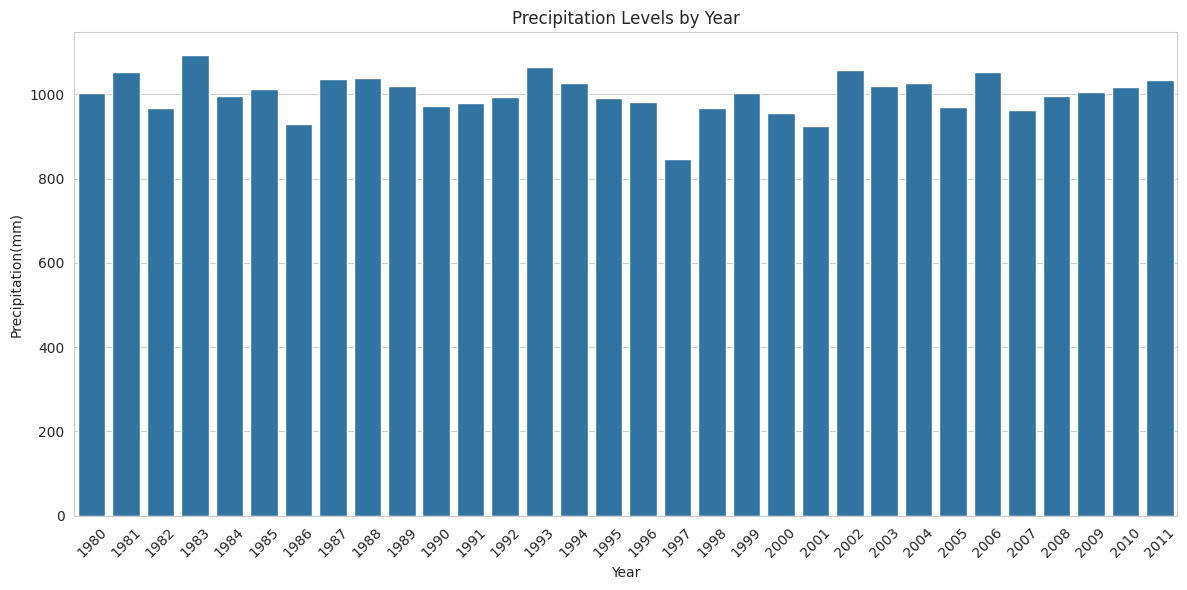

In [ ]:
#Representing the Precipittion lvels with respect to years
#data usage is Dataset

sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Precipitation', data=df1)
plt.title('Precipitation Levels by Year')
plt.xlabel('Year')
plt.ylabel('Precipitation(mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

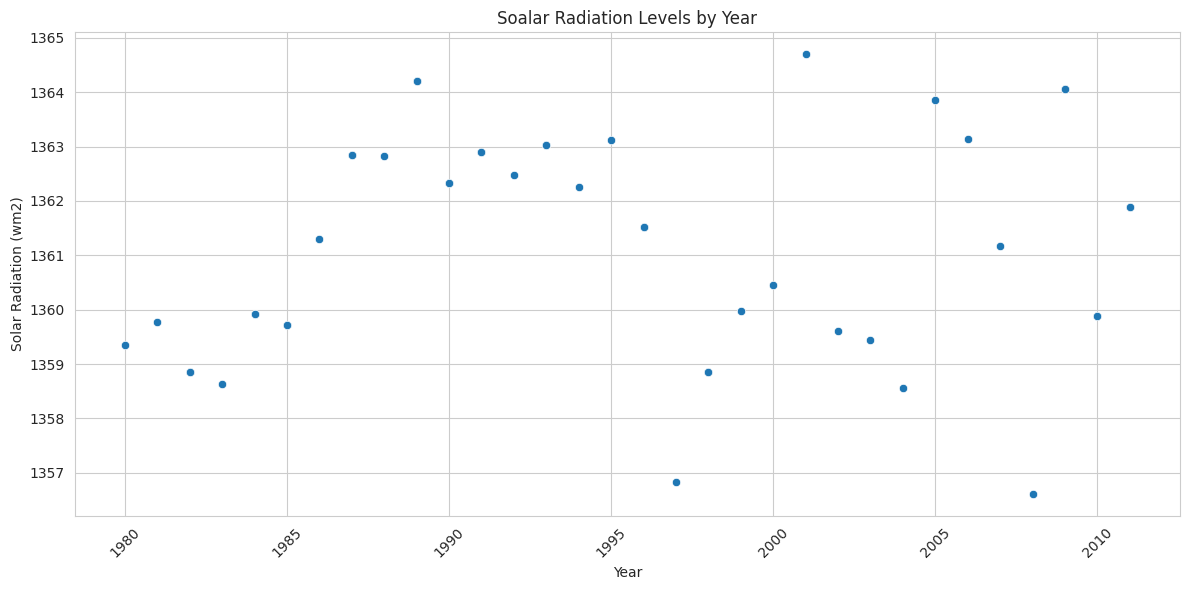

In [ ]:
#Representing the Solar radiation levels with respect to years
# data usage is Dataset

sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year', y='Solar_Radiation', data=Dataset)
plt.title('Soalar Radiation Levels by Year')
plt.xlabel('Year')
plt.ylabel('Solar Radiation (wm2)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

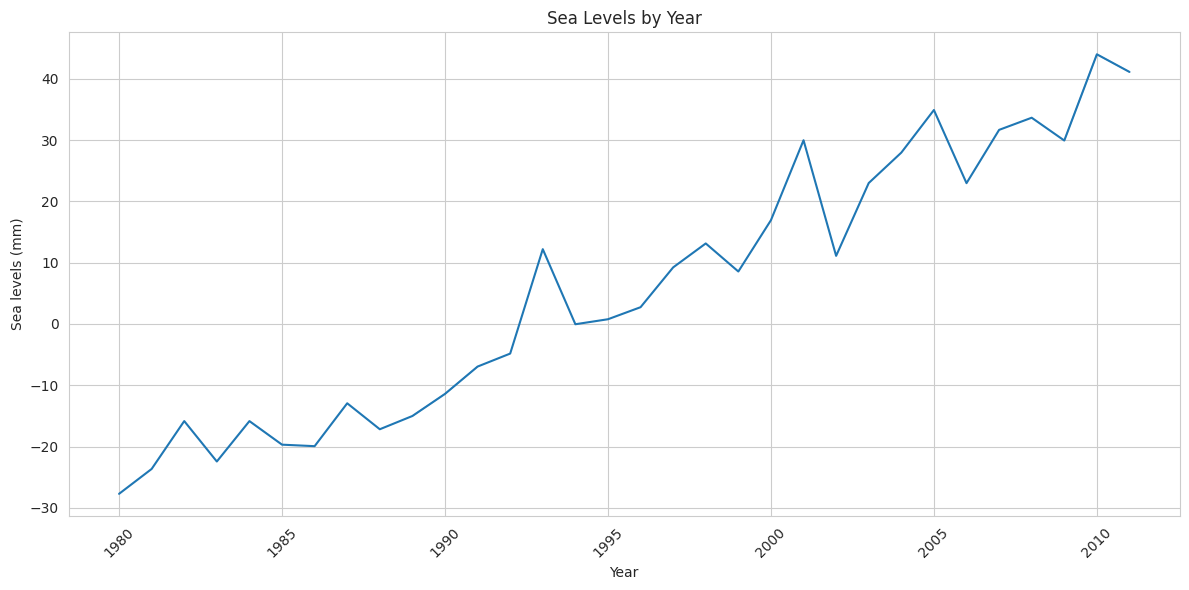

In [ ]:
#Representing the Sea levels with respect to years
#data usage is Dataset

sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Sea_level', data=Dataset)
plt.title('Sea Levels by Year')
plt.xlabel('Year')
plt.ylabel('Sea levels (mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

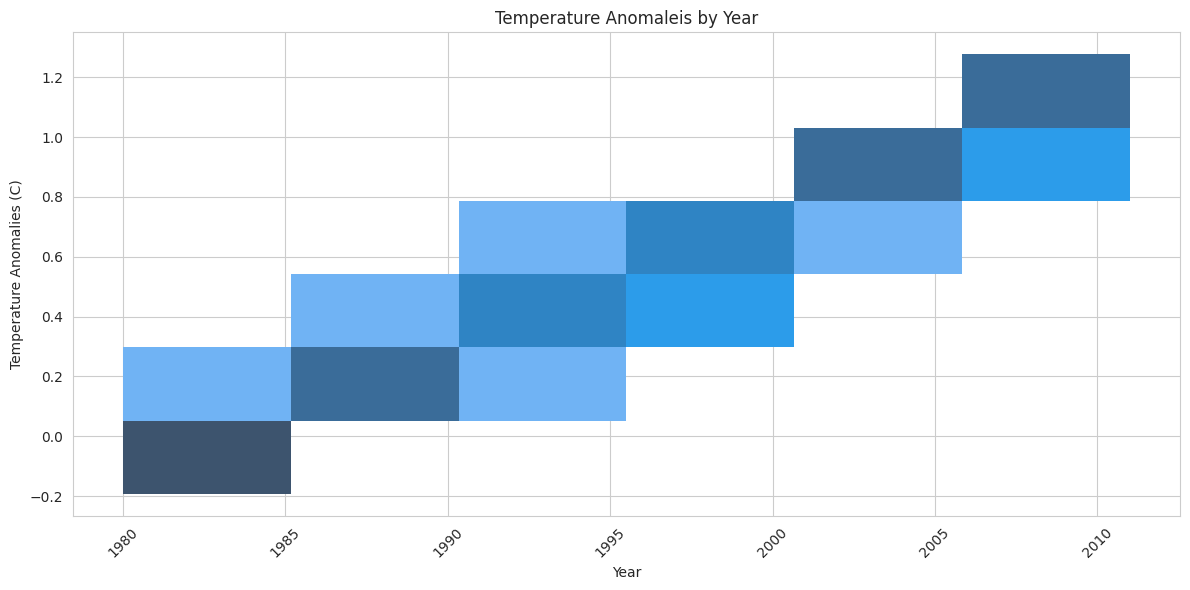

In [ ]:
#Representing the Temperature anomalies with respect to years
#data usage is Dataset

sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.histplot(x='Year', y='Temperature_anomaly', data=df1)
plt.title('Temperature Anomaleis by Year')
plt.xlabel('Year')
plt.ylabel('Temperature Anomalies (C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

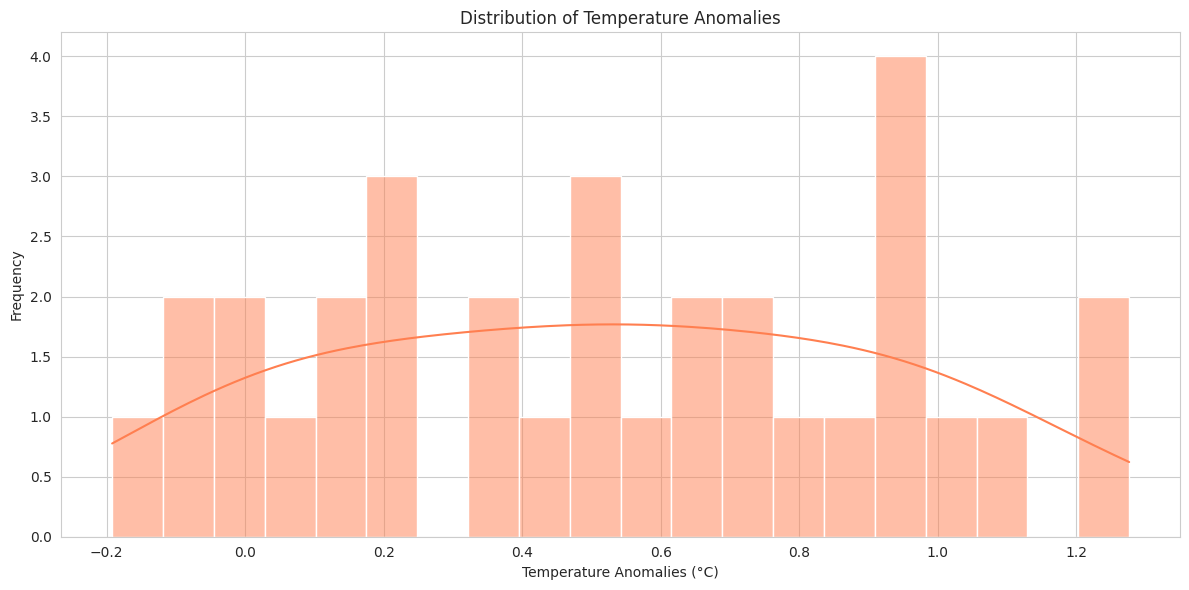

In [ ]:

#Representing Temperature anomalies
#data usage is Dataset

sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.histplot(Dataset['Temperature_anomaly'], bins=20, kde=True, color='coral')
plt.title('Distribution of Temperature Anomalies')
plt.xlabel('Temperature Anomalies (°C)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer

# we are creating a list which contains numeric values only as continuous columns

continuous_cols = [ 'likesCount','commentsCount','Year', 'Carbon Dioxide','Methane','Precipitation', 'Solar_Radiation', 'Sea_level', 'Temperature_anomaly']
#we are creating a list which contains non-numeric values only as categorical columns

categorical_cols = ['profileName']

# creating an object imputer_num of the class Simple imputer
#and calulating the mean of each continuous columns of the Dataset
#assigning the cleaned continuous columns by filled missing values with mean using fit_transform() function

imputer_num = SimpleImputer(strategy='mean')
Dataset[continuous_cols] = imputer_num.fit_transform(Dataset[continuous_cols])

#  creating an object imputer_cat of the class Simple imputer
#and calulating the most_freqient(mode) of each categorical columns of the Dataset
#assigning the cleaned categorical columns by filled missing values with mode using fit_transform() function

imputer_cat = SimpleImputer(strategy='most_frequent')
Dataset[categorical_cols] = imputer_cat.fit_transform(Dataset[categorical_cols])

# Filling missing values in 'text' column with empty string using fillna() function

Dataset['text']=Dataset['text'].fillna('')

#Verifying no missing values remains
print(Dataset.isnull().sum())

date                   32
likesCount              0
profileName             0
commentsCount           0
text                    0
Year                    0
Carbon Dioxide          0
Methane                 0
Precipitation           0
Solar_Radiation         0
Sea_level               0
Temperature_anomaly     0
dtype: int64


In [ ]:
#2.Standardize or normalise continuous features

# Standardising the continuous columns

continuous_cols=['Carbon Dioxide', 'Methane', 'Precipitation', 'Solar_Radiation',
       'Sea_level', 'Temperature_anomaly']

#Creating an object of the StandardScaler class
#StandardScalar function transforms the data by Standardising it

scaler = StandardScaler()
Dataset[continuous_cols] = scaler.fit_transform(Dataset[continuous_cols])


# Displaying whether the standardization is applied to all continuous columns

print(Dataset[continuous_cols])

    Carbon Dioxide       Methane  Precipitation  Solar_Radiation  \
2     1.393857e-16  5.316104e-16  -6.726169e-16     2.289328e-15   
4     1.393857e-16  5.316104e-16  -6.726169e-16     2.289328e-15   
5     1.393857e-16  5.316104e-16  -6.726169e-16     2.289328e-15   
7     1.393857e-16  5.316104e-16  -6.726169e-16     2.289328e-15   
9     1.393857e-16  5.316104e-16  -6.726169e-16     2.289328e-15   
..             ...           ...            ...              ...   
27    3.770867e+00  3.337079e+00  -2.275877e+00     1.512898e-01   
28    4.182678e+00  4.003485e+00  -2.482547e-01    -6.162842e+00   
29    4.348446e+00  4.339830e+00   4.107910e-01     4.145191e+00   
30    4.495504e+00  4.801503e+00   1.088176e+00    -1.630539e+00   
31    5.058373e+00  5.102031e+00   2.153686e+00     1.139477e+00   

       Sea_level  Temperature_anomaly  
2  -3.803174e-18         4.126413e-17  
4  -3.803174e-18         4.126413e-17  
5  -3.803174e-18         4.126413e-17  
7  -3.803174e-18       

In [ ]:

import warnings
warnings.filterwarnings('ignore')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


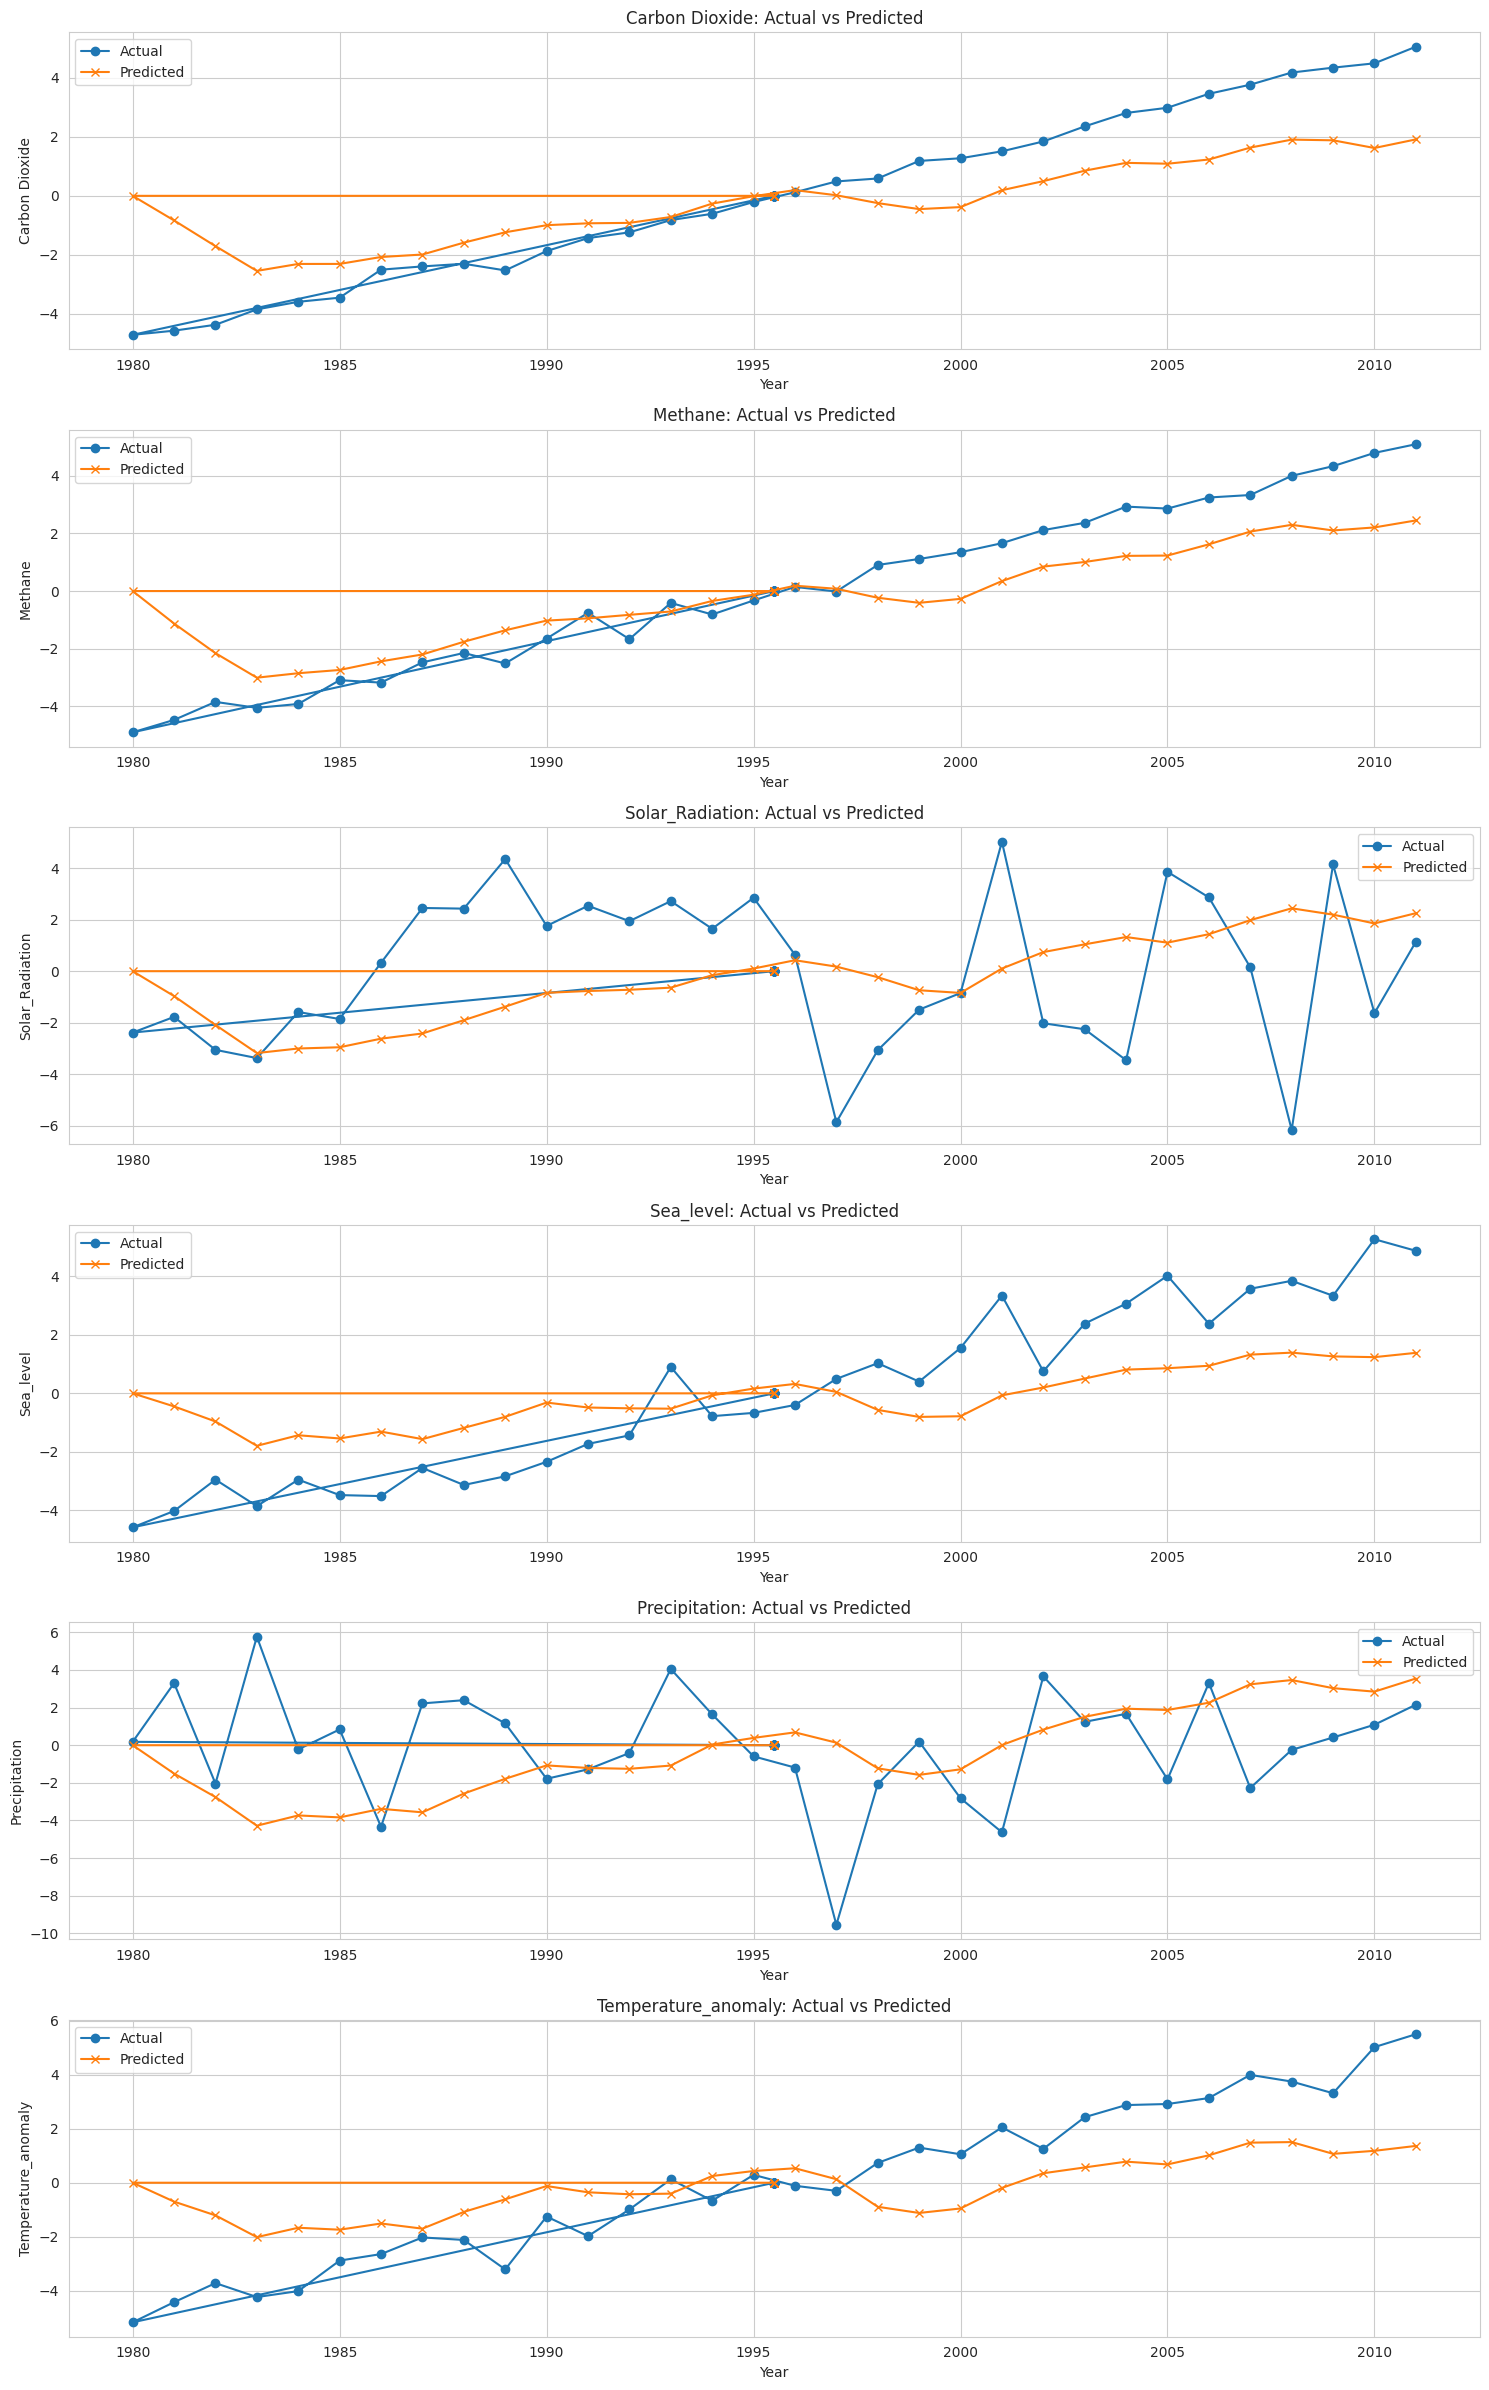

Mean Squared Error for each variable
Carbon Dioxide: 1.9884
Methane: 1.5833
Solar_Radiation: 6.4839
Sea_level: 2.8803
Precipitation: 8.3957
Temperature_anomaly: 2.8733


In [ ]:
# 6 MODEL SELECTION AND TRAINING
# Creating a long short-term model(LSTM) is used for time series data operations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

#target_cols is a lsit which contains the columns that we want to predict
#Selects the columns of interest that we want to predict
#reset_index is used to reset the index after droping the missing values

target_cols = ['Carbon Dioxide', 'Methane', 'Solar_Radiation', 'Sea_level', 'Precipitation', 'Temperature_anomaly']
Dataset = Dataset[['Year'] + target_cols].dropna().reset_index(drop=True)

# scales all the target columns to a range like [0,1] this is essential for creating LSTM model
#fit_teansform() is used to learn the min and max values from data and applied scaling
#data_scaled is a numpy array that contains 6 target variables
# scaling transforms the data so,that it fits in a specific range usually 0 to 1

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(Dataset[target_cols])

# Creating LSTM sequences ,time_steps defines a function to convert the time series data into a sequence of lengtth(time_steps=3)
# Creating a function create_sequences and passing the data,data is a scaled version of the Dataset that contains only target columns
# that we want to predict
# create sequence function transforms the time series data into sequence for LSTM
# X is the sequence of shape
# Y are the values to predict

def create_sequences(data, time_steps=3):
    X, y = [], []
    for i in range(len(data) - time_steps):#6-3
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)


time_steps = 3
X, y = create_sequences(data_scaled, time_steps)

# Splitting the data into training(80%) and testing(20%) sets
# train_size computes how many samples should go into training sets
# X is inpt data and x[:train_size] 80% goes for training input
# X[train_size:] here the remaining 20% will be testing the input
# same logic applies to the target values(y)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]# here, X_train is 80% past sequence(inputt) is used to tarin the lstm
y_train, y_test = y[:train_size], y[train_size:]# y_train is 80% of the corresponding future values,targets for training
                                                #x_test is 20% of remaining sequence, is used to test how well the model works
                                                #y_test is 20% of corresponding future values,is used for evaluation
# we are building a neural network using keras(tensorflow) to predict multiple output
# Sequential() it creates a sequencial model layers are stacked one after the otherr
# model.add,adds an LSTM layers with 64 units


model = Sequential()
model.add(LSTM(64, input_shape=(time_steps, len(target_cols))))# time_steps,3 years at a time,len(target_cols ), indicates how many features for predicting
model.add(Dense(len(target_cols)))  # output layer Dense(),means it id fully connected layer ,len(target_cols),model predicts 6 variables at once
model.compile(optimizer='adam', loss='mse')# optimiser a fast, efficient algorithm for adjusting weights
# mse a common loss function for regression

# x_train,y_trains ths trains the lstm model on training data to learn how to predict multiple climate variables
# epochs=100 this model will go through training data 100 times
# barch_size=4 the data is split into mini batches of 4 samples
# validation_aplit=0.1 10% of the training data is held out as validation set
# verbose=0 controls how much output is shown during training

model.fit(X_train, y_train, epochs=100, batch_size=4, validation_split=0.1, verbose=0)

# y_pted_scaled gives scaled output because the model was trained on scaled data
# y_pred converts the scaled predicted values back to the original scale without this the predicted values will be 0-1
# y_true this converts an actual values from scaled form back to the original real-world values

y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test)

# test_years extracts thn last n year from the year columns these year are used as x-axis
# len(y_true) nummber of test samples

test_years = Dataset['Year'].iloc[-len(y_true):].values

# creating a large plot with respect to number of target columns(6)
# loops through number of target columns

plt.figure(figsize=(15, 4 * len(target_cols)))
for i, col in enumerate(target_cols):
    plt.subplot(len(target_cols), 1, i + 1)
    plt.plot(test_years, y_true[:, i], label='Actual', marker='o')# plots for the actual values
    plt.plot(test_years, y_pred[:, i], label='Predicted', marker='x')# plots for the predicted values
    plt.title(f'{col}: Actual vs Predicted')
    plt.xlabel('Year')
    plt.ylabel(col)
    plt.legend()

plt.tight_layout()
plt.show()

#7 MODEL EVALUATION
# mse tells how far the predictions from the actual values
 #y_true actual values of ith variable, y_pred predicted values of ith variabley_pred predicted values of ith variable
print("Mean Squared Error for each variable")
for i,col in enumerate(target_cols):
    mse = mean_squared_error(y_true[:, i], y_pred[:, i])
    print(f"{col}: {mse:.4f}")

In [ ]:

#8. FUTURE PROJECTION

# MSE values for each variable
# this dictionary stores the Mse values for each variable

mse_dict = {
    "Carbon Dioxide": 2.3728,
    "Methane": 2.4022,
    "Solar_Radiation": 6.2247,
    "Sea_level": 2.4535,
    "Precipitation": 9.3021,
    "Temperature_anomaly": 2.0977
}
#using the trained model to predict the n_years of the future
# model is the trained model
# data_scaled is the  scaled dataset
# n_years ie number of years to predict forward
#time_steps ie past 3 years is given as input to the model for each Prediction
# target_cols ie are the columns that we want to predict

def project_future_increasing(model, data_scaled, n_years=19, time_steps=3, target_cols=None):
    # future_prrdictions is a lsit will store the scaled prediction for each future year

    future_predictions = []
    input_seq = data_scaled[-time_steps:].copy()

    #converting the mse values to growth factor
    #converts the dictionaries into numpy array,preserving the order of target_cols
    #min 0.002 growth per year
    # max 0.002*0.005 growth per year

    mse_values = np.array([mse_dict[col] for col in target_cols])
    base_growth_factors = 0.002 + (mse_values / mse_values.max()) * 0.005  # scaled between 0.2% and 0.7%

    # keeping track of the last predicted values
    last_actual_scaled = input_seq[-1].copy()

     # loops once for each future year
     #lstm model expects input as (batch_size,time_steps, features)
     # input_seq ie reshaped so, the model can take it

    for _ in range(n_years):
        input_reshaped = np.reshape(input_seq, (1, time_steps, data_scaled.shape[1]))
        pred_scaled = model.predict(input_reshaped, verbose=0)

        # generates the next year s scaled predictions
        pred_scaled = pred_scaled * (1 + base_growth_factors)

        # slightly increases the predictions according to the growth factor
        # if any predicted values is less than the actual previous values
        # then it is replaced as the last_actual + growth factors

        for i in range(pred_scaled.shape[1]):
            if pred_scaled[0, i] < last_actual_scaled[i]:
                pred_scaled[0, i] = last_actual_scaled[i] + base_growth_factors[i]

        # Adding the predictions to the list future predictiona
        # updating the last_actual_scaled for the nect loop
        # input_seq ie removing the old predicted values and adding the new prediction

        future_predictions.append(pred_scaled[0])
        last_actual_scaled = pred_scaled[0]
        input_seq = np.vstack((input_seq[1:], pred_scaled))

    # Returns the results as numpy array of all scaled future PROJECTIONS
    return np.array(future_predictions)


# caling the function
# runs the projections for 19 years ahead

n_years = 19
future_pred_scaled = project_future_increasing(model, data_scaled, n_years=n_years, time_steps=3, target_cols=target_cols)

# takes the scaled predictions and transforms them back to original units
future_pred = scaler.inverse_transform(future_pred_scaled)

# taking the last actual year from the dataset
#cteating a range of years for the predictions

last_year = Dataset['Year'].iloc[-1]
future_years = np.arange(last_year + 1, last_year + n_years + 1)

# creating a DataFrame with prediction
# inserts the year columns at the front

future_df = pd.DataFrame(future_pred, columns=target_cols)
future_df.insert(0, 'Year', future_years)

# rounds the values with 2 decimal places
#prints the future projection table
print("\nFuture Climate Indicator Projections:")
print(future_df.round(2))


Future Climate Indicator Projections:
      Year  Carbon Dioxide  Methane  Solar_Radiation  Sea_level  \
0   2012.0            5.09     5.13             3.36       4.91   
1   2013.0            5.12     5.17             3.71       4.94   
2   2014.0            5.15     5.20             4.23       4.98   
3   2015.0            5.19     5.23             4.58       5.01   
4   2016.0            5.22     5.27             4.73       5.04   
5   2017.0            5.25     5.30             4.86       5.07   
6   2018.0            5.28     5.33             4.95       5.11   
7   2019.0            5.31     5.37             5.01       5.14   
8   2020.0            5.35     5.40             5.06       5.17   
9   2021.0            5.38     5.43             5.10       5.20   
10  2022.0            5.41     5.46             5.13       5.24   
11  2023.0            5.44     5.50             5.16       5.27   
12  2024.0            5.47     5.53             5.19       5.30   
13  2025.0            5

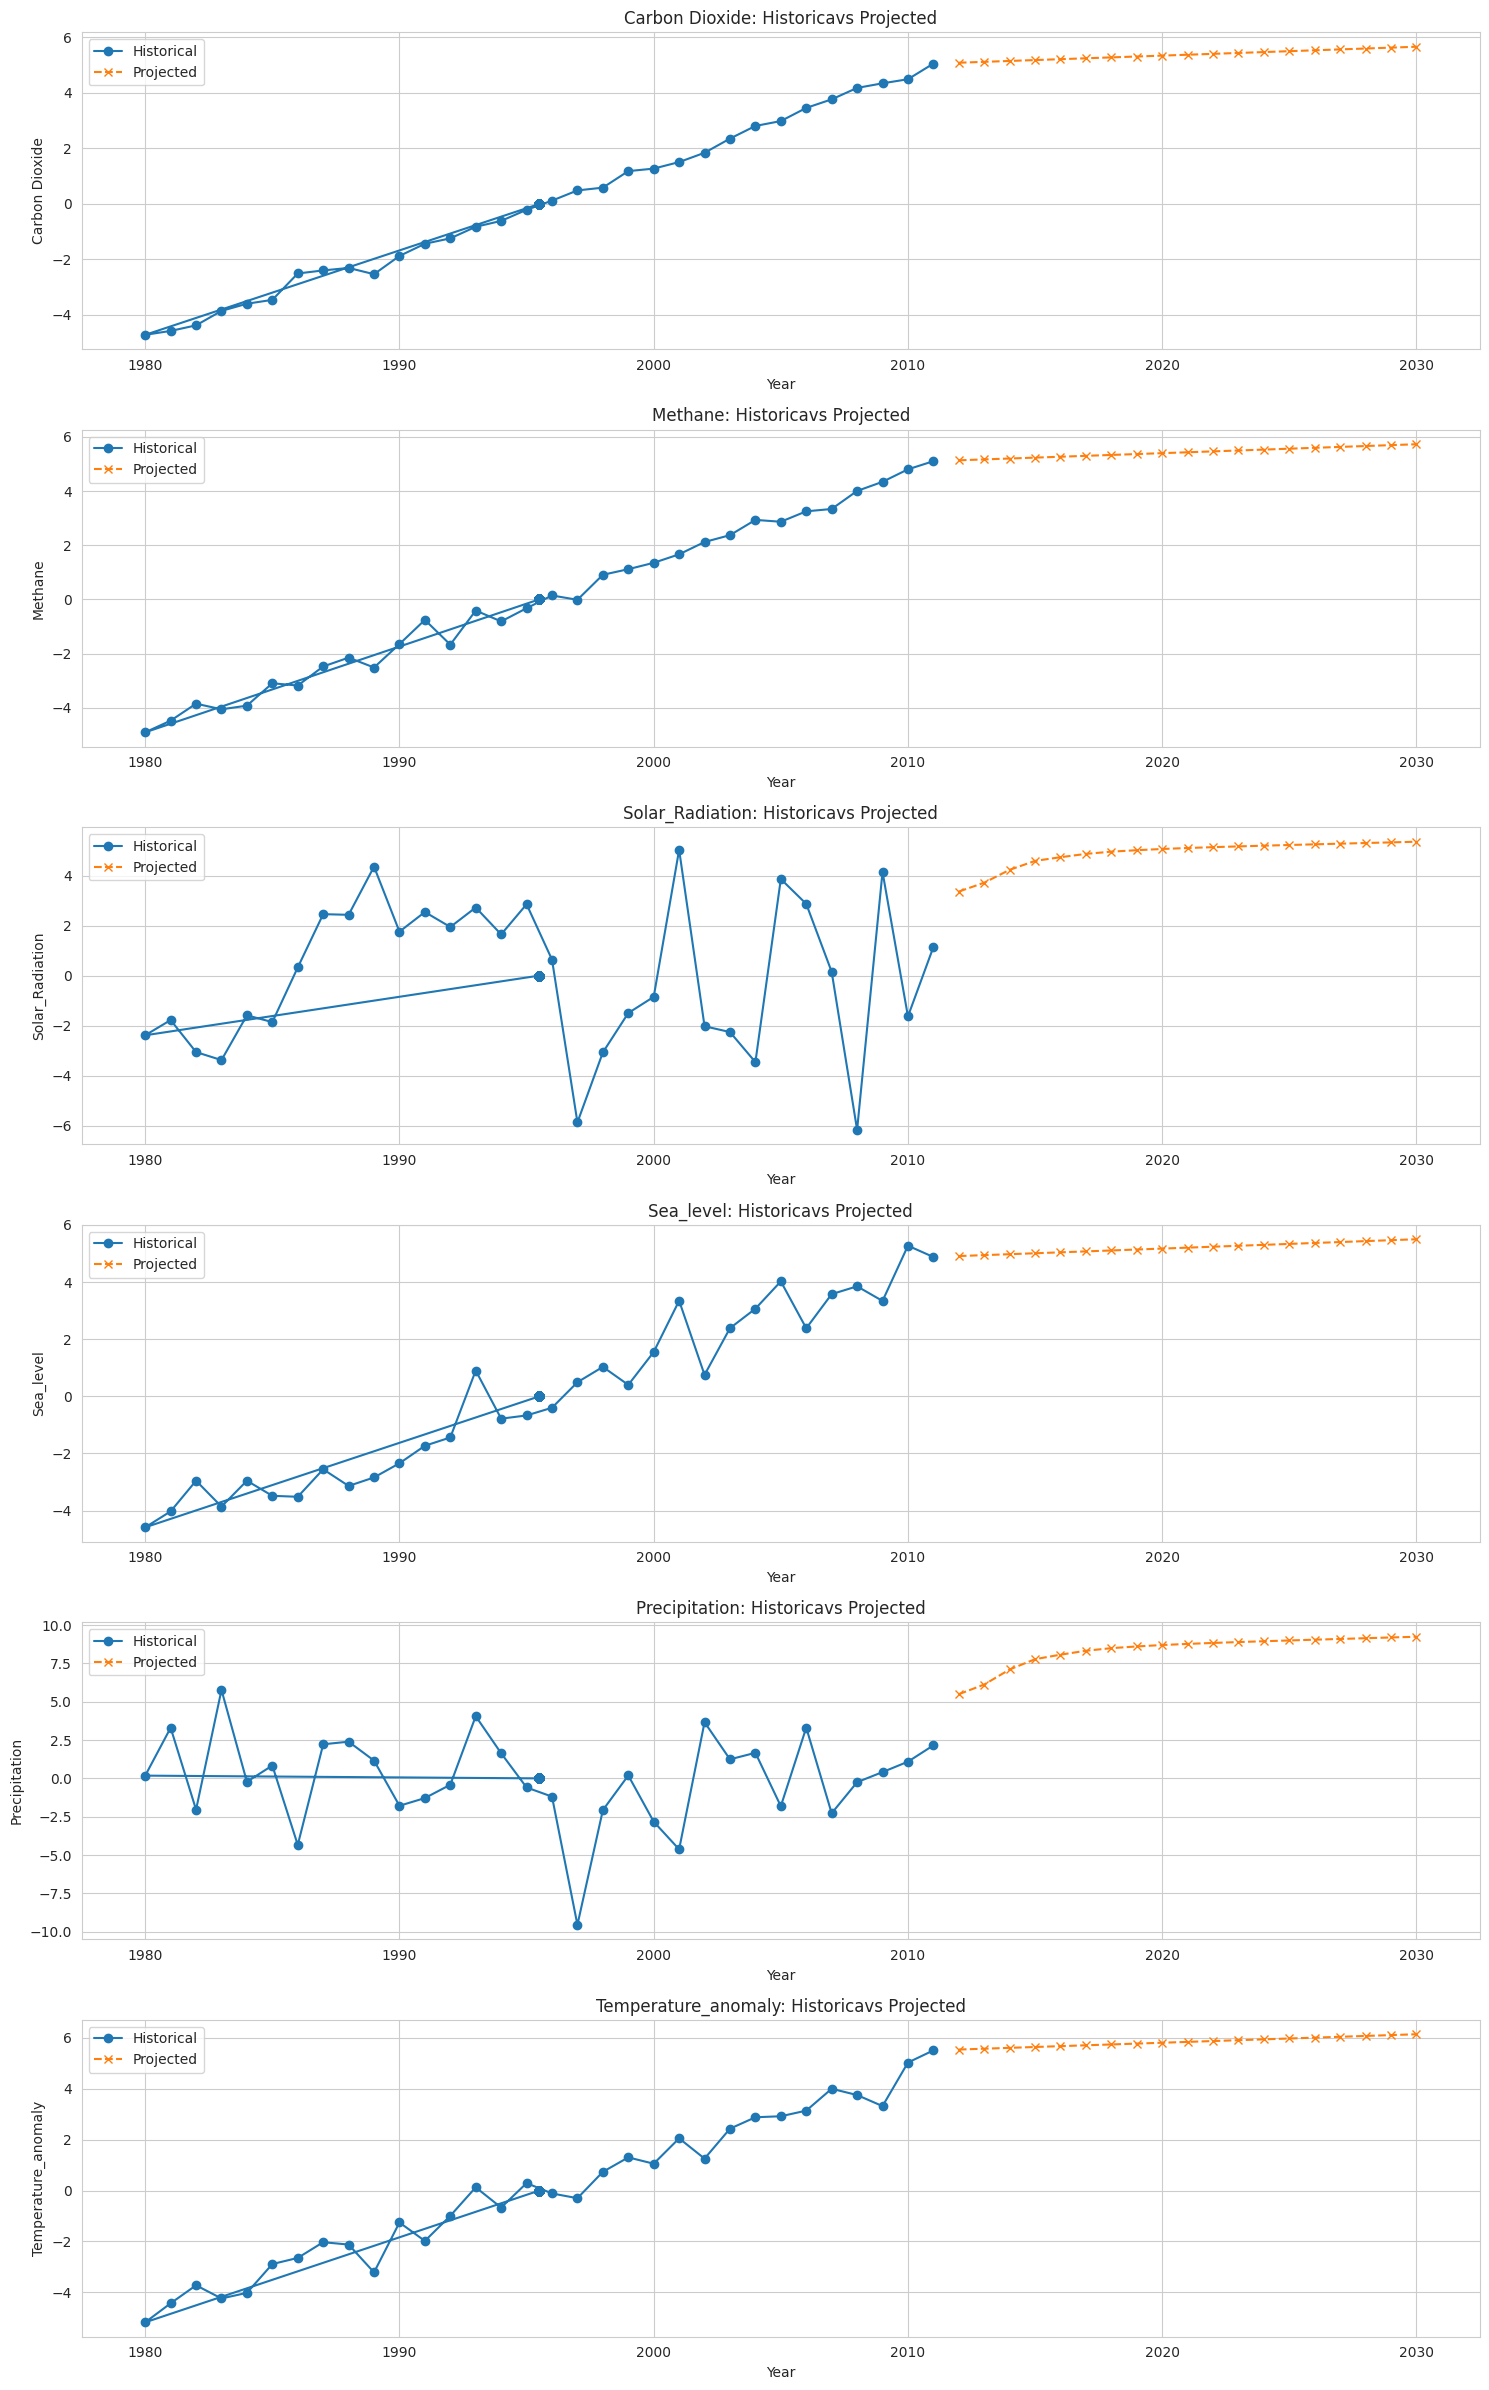

In [ ]:

#Display the predicted future columns with respect to actual values
#acctual values(1980-2011) and predicted future values (2012-2030)#using the line plot

plt.figure(figsize=(15, 4 * len(target_cols)))
for i, col in enumerate(target_cols):
    plt.subplot(len(target_cols), 1, i + 1)
    plt.plot(Dataset['Year'], Dataset[col], label='Historical', marker='o')
    plt.plot(future_df['Year'], future_df[col], label='Projected', marker='x', linestyle='--')
    plt.title(f'{col}: Historicavs Projected')
    plt.xlabel('Year')
    plt.ylabel(col)
    plt.legend()

plt.tight_layout()
plt.show()

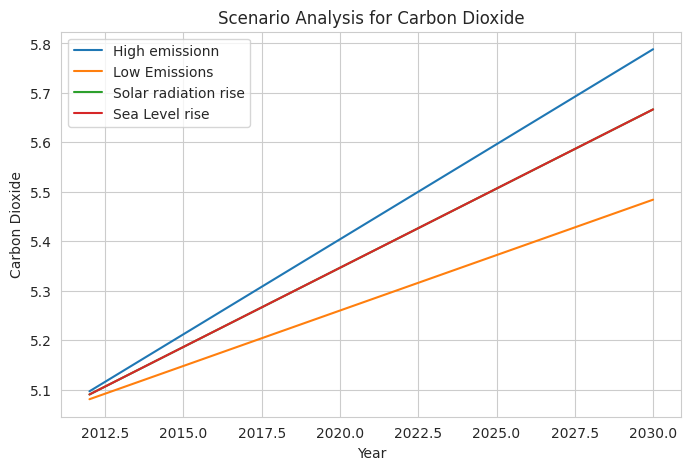

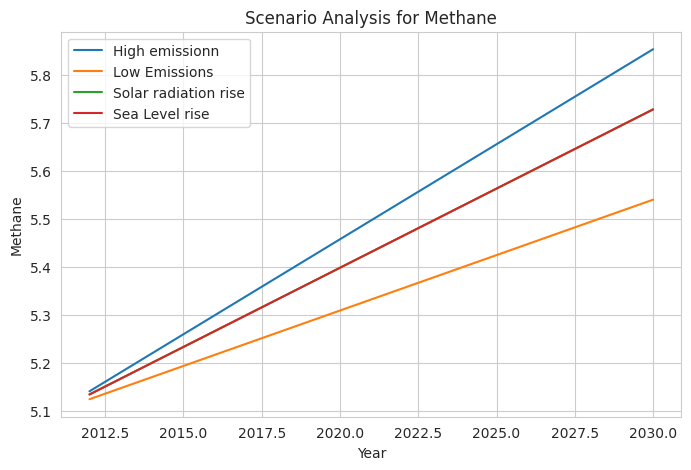

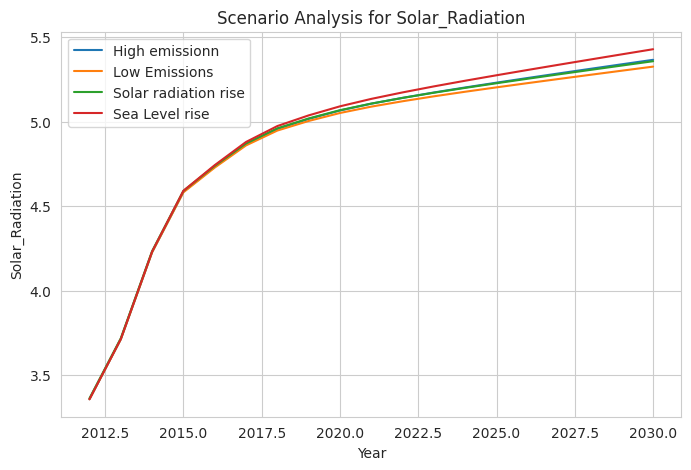

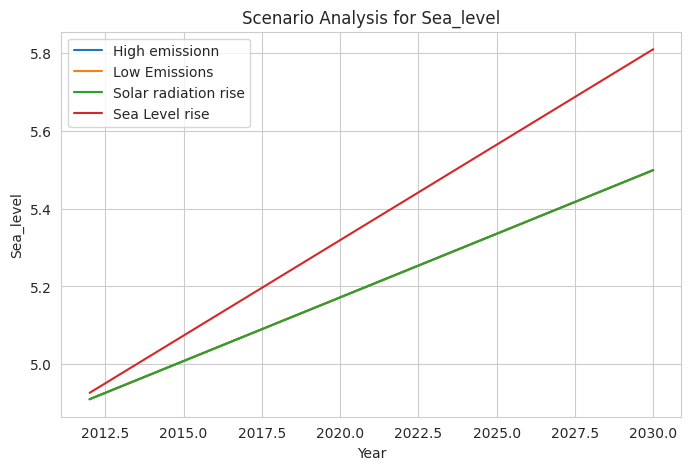

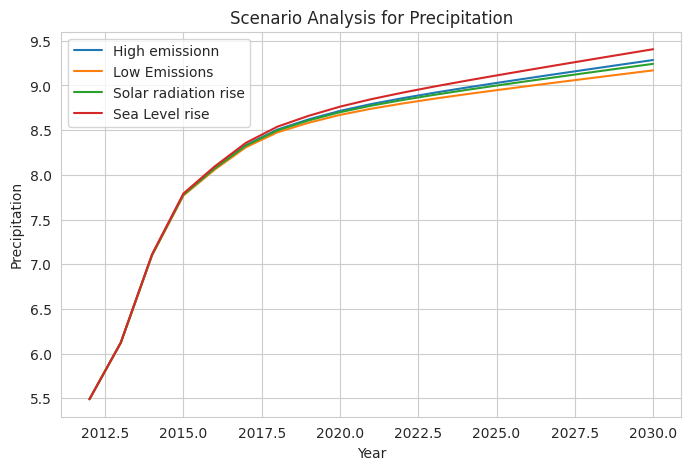

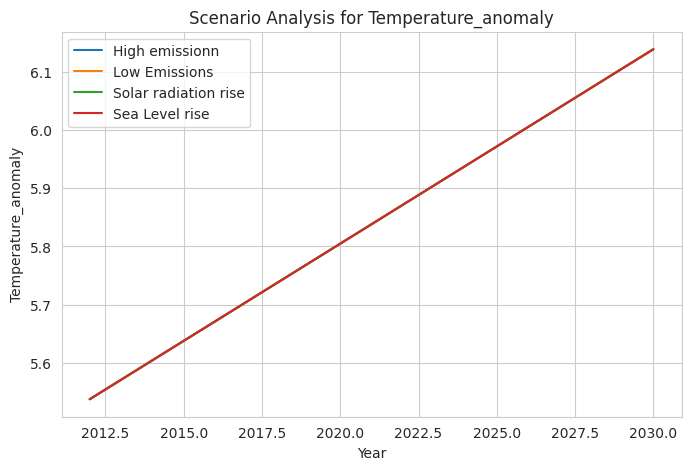

In [ ]:

#9. SCENARIO ANALYSIS

#  MSE values for each variable
mse_dict = {
    "Carbon Dioxide": 2.3728,
    "Methane": 2.4022,
    "Solar_Radiation": 6.2247,
    "Sea_level": 2.4535,
    "Precipitation": 9.3021,
    "Temperature_anomaly": 2.0977
}

#defining a function project_scenario to produce n_years to future projection
#model ie training sequence model
#data_scalrd ie scaled historical data
# n_years ie 19 years of future projections
# time_steps=3 ie the length of the input sequence model
#target_cols ie the list of columns that we want to predict
# scenario _factor ie dictionary with variable multiplier

def project_scenario(model, data_scaled, n_years=19, time_steps=3, target_cols=None, scenario_factors=None):
    # if scenario _gactors are not provided set it as empty dict
    if scenario_factors is None:
        scenario_factors = {}

     # future_predictions is a list stores
    future_predictions = []
    input_seq = data_scaled[-time_steps:].copy()

    #creates a numpy array as mse values in the same order as target_cols
    # creating a base growth factor per variable

    mse_values = np.array([mse_dict[col] for col in target_cols])
    base_growth_factors = 0.002 + (mse_values / mse_values.max()) * 0.005

    # creating a numpy array as scenario multipliers in the order of target_cols
    # if a variable is not specified in scenario factor ,default multiplier is 1.0
    #fianl growth factor per variable=growth factor x scenario multiplier

    scenario_array = np.array([scenario_factors.get(col, 1.0) for col in target_cols])
    growth_factors = base_growth_factors * scenario_array

    # stores the last rows as the input for the modwl
    last_actual_scaled = input_seq[-1].copy()
    # loop to generate one prediction per future year,repeated 19 times (n_yeard)

    for _ in range(n_years):
        # Reshapes the input_seq to match the model
        # input:(batch_size=1,time_steps, features)
        #model outputs the next step prediction in the scaled
        input_reshaped = np.reshape(input_seq, (1, time_steps, data_scaled.shape[1]))
        pred_scaled = model.predict(input_reshaped, verbose=0)

        #raises each predicted scaled feature slightly by its corresponding growth factors
        # multiplying the 1+ growth factor increasing the scaled units
        pred_scaled = pred_scaled * (1 + growth_factors)

        # iterates over each feature and implements monotonic growth
        for i in range(pred_scaled.shape[1]):
            # if the new prediction is smaller than previous apply last_actual + growth factor
            if pred_scaled[0, i] < last_actual_scaled[i]:
                pred_scaled[0, i] = last_actual_scaled[i] + growth_factors[i]

        # appending the prediction to the future prediction lsit
        future_predictions.append(pred_scaled[0])

         # updating the last_avtual_scaled to the prediction
        last_actual_scaled = pred_scaled[0]
        # droping the oldest row input_seq[1:] nd appending the newest prediction pred scaled to keep the length of time_steps
        # resulting input_seq shape remains (time_steps, features)

        input_seq = np.vstack((input_seq[1:], pred_scaled))
    # converting the list of predicted values to a numpy array with shape (n_years,n_features) and returning it
    return np.array(future_predictions)


# Defining a dictionary scenarios each value is a scenario factor dict passed to the function
# high emission CO2 and methane multipliers by 1.2 ( increases base growth by 20%)
# loww emissions CO2 and methane multipliers by 0.7 (reducing the growth by 70%)
#
scenarios = {
    "High emissionn": {"Carbon Dioxide": 1.2, "Methane": 1.2},
    "Low Emissions": {"Carbon Dioxide": 0.7, "Methane": 0.7},
    "Solar radiation rise": {"Solar_Radiation": 1.1},
    "Sea Level rise": {"Sea_level": 1.5}
}

# creating a empty dictionary to hold dataframe of results per scenario
scenario_results = {}
# getting the last year of the Dataset
last_year = Dataset['Year'].iloc[-1]
#creating an array of years for the projections
#from last_year+1 to last_year+19
future_years = np.arange(last_year + 1, last_year + 20)

#iteerating through each scenario name+ it's factor dict
for name, factors in scenarios.items():
     # calling the project_scenario for this scenario and  receives scaled predictions (19,n_features)
    future_pred_scaled = project_scenario(model, data_scaled, n_years=19, time_steps=3,
                                          target_cols=target_cols, scenario_factors=factors)

    #converting the scaled predictions back to the original units using scaler.inverse_ transform
    future_pred = scaler.inverse_transform(future_pred_scaled)

    # creating the dataframe for the scenario with the columns of target variable
    future_df = pd.DataFrame(future_pred, columns=target_cols)

     # inserting the year column as the first colum matching each row with the predicted year
    future_df.insert(0, 'Year', future_years)

    # save the dataframe into scenario results under the scenario name key
    scenario_results[name] = future_df

# plotting the scenarios one by one in the target_cols using a line plot

for col in target_cols:
    plt.figure(figsize=(8, 5))
    for name, df in scenario_results.items():
        plt.plot(df['Year'], df[col], label=name)
    plt.title(f"Scenario Analysis for {col}")
    plt.xlabel("Year")
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.show()